In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive

**READING THE CSV FILE**

In [ ]:
df = pd.read_csv("C:/Users/priya/Desktop/Priya/Dataset-SA.csv")
#df = pd.read_csv("/content/Dataset-SA.csv")
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**REMOVING THE COLUMNS CONTAINING IRRELEVANT VALUES**

In [ ]:

df.drop(['product_name', 'product_price', 'Rate', 'Review'], axis=1, inplace=True)

In [ ]:
df['Summary'].dtype

dtype('O')

In [ ]:
#!pip install textblob

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from textblob import Word
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#sentiment count
df['Sentiment'].value_counts()

Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64

**DATA PREPROCESSING**

In [ ]:

Summary=df['Summary']

In [ ]:
## cleaning the Summary
def cleantext(summary):
    if not isinstance(summary, str):
        summary = str(summary)
    # ... rest of the function
    # removing the "\"
    summary = re.sub("'\''","",summary)
    # removing special symbols
    summary = re.sub(r"https\S+|www\S+https\S+", '',summary, flags=re.MULTILINE)
    summary = re.sub("[^a-zA-Z]"," ",summary)
    # removing the whitespaces
    summary = ' '.join(summary.split())
    # convert text to lowercase
    summary = summary.lower()
    return summary

df['Summary'] = df['Summary'].apply(lambda x:cleantext(x))
df['Summary'].iloc[1]

'best budget fit cooler nice cooling'

In [ ]:
print(Summary.head())

0    great cooler excellent air flow and for this p...
1                best budget 2 fit cooler nice cooling
2    the quality is good but the power of air is de...
3                    very bad product its a only a fan
4                                        ok ok product
Name: Summary, dtype: object


**Labeling**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply label encoding to the 'Sentiment' column and create a new column 'sentiment_encoded'
df['sentiment_encoded'] = encoder.fit_transform(df['Sentiment'])

x = df['Summary']
sentnces = [Summary.split() for Summary in x]

**count plot for postive, negtive and neutral sentiments**

In [ ]:
X = df['Summary']
Y = df['sentiment_encoded']

In [ ]:
print(X.head())

0    great cooler excellent air flow and for this p...
1                  best budget fit cooler nice cooling
2    the quality is good but the power of air is de...
3                    very bad product its a only a fan
4                                        ok ok product
Name: Summary, dtype: object


In [ ]:
print(Y.head())

0    2
1    2
2    2
3    0
4    1
Name: sentiment_encoded, dtype: int32


**TD-IDF feature extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer

**Sparse saving in a path**

In [ ]:
#from scipy import sparse
#sparse.save_npz('C:/Users/GPU_CA/Downloads/Priya/tfidf.npz (2).txt',result)

In [ ]:
import scipy.sparse as sp
#File path where tfidf file is saved
path_npz='C:/Users/priya/Desktop/Priya/tfidf.npz'

#Load the Tf-idf sparse matrix from NPZ file
x=sp.load_npz(path_npz)

In [ ]:
x.shape

(205052, 42370)

**Spliting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test =train_test_split(x,Y,test_size =0.4, random_state=42)
X_val ,X_test1 ,y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
X_train.shape

(123031, 42370)

**Undersampling using ENN**

In [ ]:
# Apply Near Miss undersampling
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1,n_neighbors=3)
X_train_re,y_train_re = nm.fit_resample(X_train,y_train)

In [ ]:
X_test_re,y_test_re = nm.fit_resample(X_test,y_test)
X_val_re,y_val_re = nm.fit_resample(X_val,y_val)
X_test1_re,y_test1_re = nm.fit_resample(X_test1,y_test1)

In [ ]:
print(y_train_re.value_counts())

sentiment_encoded
0    6116
1    6116
2    6116
Name: count, dtype: int64


In [ ]:
print(X_train_re.shape)
print(y_train_re.shape)

(18348, 42370)
(18348,)


In [ ]:
X_train_re = X_train_re.toarray()
X_test_re = X_test_re.toarray()
X_val_re = X_val_re.toarray()
X_test1_re =X_test1_re.toarray()

In [ ]:
X_train_re.shape


(18348, 42370)

In [ ]:
X_test_re.shape

(12369, 42370)

In [ ]:
X_val_re.shape

(6261, 42370)

In [ ]:
X_test1_re.shape

(6108, 42370)

**Reshaping**

In [ ]:
X_train_re = X_train_re.reshape((X_train_re.shape[0], 1, X_train_re.shape[1]))
X_test1_re = X_test1_re.reshape((X_test1_re.shape[0], 1, X_test1_re.shape[1]))
X_val_re = X_val_re.reshape((X_val_re.shape[0], 1, X_val_re.shape[1]))

In [ ]:
print(X_train_re.shape)
print(X_test1_re.shape)
print(X_val_re.shape)

(18348, 1, 42370)
(6108, 1, 42370)
(6261, 1, 42370)


In [ ]:
print(X_train_re.shape[0])
print(X_train_re.shape[1])
print(X_train_re.shape[2])

18348
1
42370


In [ ]:
import keras.utils
y_train = keras.utils.to_categorical(y_train_re)
y_test1= keras.utils.to_categorical(y_test1_re)
y_val =keras.utils.to_categorical(y_val_re)

In [ ]:
print(y_train.shape)
print(y_test1.shape)
print(y_val.shape)

(18348, 3)
(6108, 3)
(6261, 3)


In [ ]:
#from keras.layers.rnn import LSTMV1
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Dense
from keras.models import Sequential, Model
#from keras.utils import plot_model
from keras.layers import Input, Dense, Dropout
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers

output_dim = 3
batch_size = 32
nb_epoch = 198

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy, Recall, Precision, AUC

**model**

In [ ]:

# Model with Attention Layer
def create_model():
    # input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train_re.shape[1], X_train_re.shape[2]))
    #inputs = tf.keras.Input(shape=(1,42370))

    gru1_1 = GRU(2048, return_sequences=True)(inputs)
    gru1_2 = GRU(1024, return_sequences=True)(gru1_1)
    gru1_3 = GRU(512, return_sequences=True)(gru1_2)
    #concat = Concatenate()([gru1_3, gru2_3, gru3_3])

    # Apply Attention Layer
    #attention_output = AttentionLayer()(gru1_2)


    # Concatenate Attention Output and Concat
    #attention_concat = Concatenate()([concat, attention_output])

    #flatten = Flatten()(gru1_)

    rnn1 = SimpleRNN(128)(gru1_3)

    #rnn4 = SimpleRNN(32, return_sequences= True)(rnn1)

    output1 = Dense(32, activation='relu')(rnn1)

    outputs = Dense(3, activation='softmax')(output1)

    model = Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [ ]:
#cretaing model
rnnmodel = create_model()
#Compiling model
rnnmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1, 42370)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_15 (GRU)                         │ (None, 1, 2048)             │     272,916,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_16 (GRU)                         │ (None, 1, 1024)             │       9,443,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_17 (GRU)                         │ (None, 1, 512)              │       2,362,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,808,451 (1.06 GB)

 Trainable params: 284,808,451 (1.06 GB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = rnnmodel.fit(X_train_re, y_train, epochs=30, batch_size=64, validation_data=(X_val_re, y_val))

Epoch 1/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1110s 4s/step - AUC: 0.9323 - Precision: 0.8590 - Recall: 0.8296 - accuracy: 0.8505 - loss: 0.4779 - val_AUC: 0.9690 - val_Precision: 0.9054 - val_Recall: 0.8895 - val_accuracy: 0.8941 - val_loss: 0.2993
Epoch 2/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1053s 4s/step - AUC: 0.9727 - Precision: 0.9164 - Recall: 0.9117 - accuracy: 0.9140 - loss: 0.2556 - val_AUC: 0.9647 - val_Precision: 0.8961 - val_Recall: 0.8957 - val_accuracy: 0.8960 - val_loss: 0.3268
Epoch 3/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1039s 4s/step - AUC: 0.9794 - Precision: 0.9308 - Recall: 0.9271 - accuracy: 0.9289 - loss: 0.2187 - val_AUC: 0.9750 - val_Precision: 0.9098 - val_Recall: 0.9000 - val_accuracy: 0.9053 - val_loss: 0.2697
Epoch 4/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1041s 4s/step - AUC: 0.9820 - Precision: 0.9276 - Recall: 0.9190 - accuracy: 0.9237 - loss: 0.2091 - val_AUC: 0.9735 - val_Precision: 0.9028 - val_Recall: 0.9021 - val_accuracy: 0.9023 - val_loss: 0.2775
Epoch 5/30
287/287 ━━━━━

In [ ]:
pred=rnnmodel.predict(X_test1_re)

191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step


Text(0, 0.5, 'Accuracy')

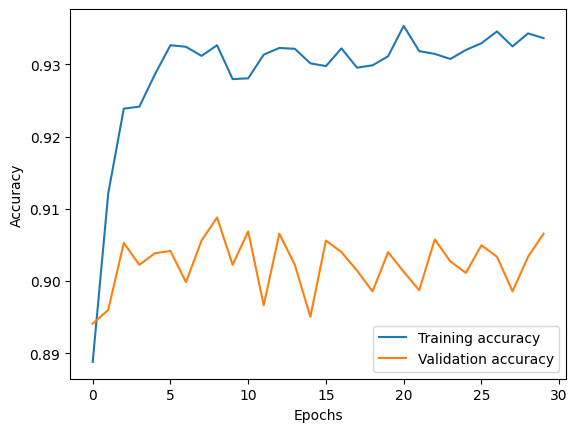

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

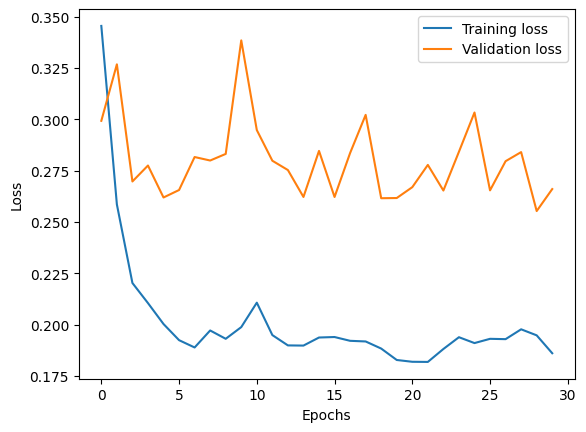

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

Accuracy: 0.917813


**Concatenation**

In [ ]:
def create_model2():
    # input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train_re.shape[1], X_train_re.shape[2]))
    #inputs = tf.keras.Input(shape=(1,42370))

    gru1_1 = GRU(2048, return_sequences=True,dropout=0.2)(inputs)
    gru1_2 = GRU(1280, return_sequences=True,dropout=0.2)(gru1_1)
    gru1_3 = GRU(768, return_sequences=True,dropout=0.2)(gru1_2)

    lstm1 = LSTM(1792, return_sequences=True,dropout=0.2)(inputs)
    lstm2 = LSTM(1024, return_sequences=True,dropout=0.2)(gru2_1)
    lstm3 = LSTM(768, return_sequences=True,dropout=0.2)(gru2_2)


    concat = Concatenate()([gru1_3, lstm3])



    rnn1 = SimpleRNN(128, return_sequences=True,dropout=0.2)(concat)

    rnn4 = SimpleRNN(32, activation='relu',dropout=0.2)(rnn1)

    outputs = Dense(3, activation='softmax')(rnn4)

    model = Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [ ]:
conmodel = create_model2()
conmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

In [ ]:
history = conmodel.fit(X_train_re, y_train, epochs=10, batch_size=32, validation_data=(X_val_re, y_val))

In [ ]:
pred=conmodel.predict(X_test1_re)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

**LSTM**

In [ ]:
def lstm():
    inputs = tf.keras.Input(shape=(X_train_re.shape[1], X_train_re.shape[2]))
    lstm = LSTM(1024)(inputs)

    outputs = Dense(3, activation='softmax')(lstm)

    model = Model(inputs=inputs, outputs=outputs)

    print(model.summary())
    return model

In [ ]:
lstmmo = lstm()
lstmmo.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', dtype=None, threshold=0.5),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

In [ ]:
import keras
from keras.utils import plot_model
plot_model(lstmmo)

In [ ]:
history = lstmmo.fit(X_train_re, y_train, epochs=30, batch_size=32, validation_data=(X_val_re, y_val))

**Model saving**

In [ ]:
lstmmo.save('lstmmo_Priya.keras')

In [ ]:
pred=lstmmo.predict(X_test1_re)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

**GRU**

In [ ]:
def gru():
    inputs = tf.keras.Input(shape=(1,42370))
    gru = GRU(512)(inputs)

    #flatten = Flatten()(gru)
    outputs = Dense(3, activation='softmax')(gru)

    model = Model(inputs=inputs, outputs=outputs)

    print(model.summary())
    return model

In [ ]:
grumodel = gru()
grumodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', dtype=None, threshold=0.5),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

In [ ]:
import keras
from keras.utils import plot_model
plot_model(grumodel)

In [ ]:
history = grumodel.fit(X_train_re, y_train, epochs=30, batch_size=32, validation_data=(X_val_re, y_val))

**Model saving**

In [ ]:
grumodel.save('grumodel.keras')

In [ ]:
pred=grumodel.predict(X_test1_re)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

**BidirectionLSTM**

In [ ]:
def lstm():
    inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2]))
    lstm_1 = Bidirectional(LSTM(512))(inputs)

    lstm_4 = Bidirectional(LSTM(32, activation='sigmoid'))(lstm_1)

    outputs = Dense(3, activation='softmax')(lstm_4)

    model = Model(inputs=inputs, outputs=outputs)

    print(model.summary())
    return model

In [ ]:
lstmmodel = lstm()
lstmmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', dtype=None, threshold=0.5),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

In [ ]:
import keras
from keras.utils import plot_model
plot_model(lstmmodel)

In [ ]:
history = lstmmodel.fit(X_train_re, y_train, epochs=30, batch_size=32, validation_data=(X_val_re, y_val))

In [ ]:
lstmmodel.save('lstmmodel.keras')

In [ ]:
pred=lstmmodel.predict(X_test1_re)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))